# **1. Data Preparation**

## **Problem Statement**:
Tim Marketing disebuah mall ingin melakukan pemasaran kepada konsumen, dalam melakukan pemasaran ini tim marketing memerlukan sebuah analisa untuk mengetahui konsumen mana yang memiliki pendapatan yang tinggi dan mau mengeluarkan uang yang tinggi juga saat berkunjung ke mall. Jika tim marketing mengelompokkan 1 persatu konsumen berdasarkan usia nya, gender nya, pendapatan perbulan dari masing-masing usia serta skor berdasarkan tingkat belanja maka ini membutuhkan waktu yang lama.

## **Goals**:

Tim Data Scienct akan membantu tim marketing untuk memecahkan masalah ini dengan menggunakan `Machine Learning Unsupervised` untuk membantu mengelompokkan konsumen berdasarkan Usia, Gender, Annual Income dan Spending Score yang mana akan berguna untuk tim marketing dalam menentukan konsumen mana yang akan menjadi target pemasaran mereka dengan tepat.

## **Analytical Approach**

- Pendekatan analisa ini dengan cara melakukan pembagian variabel pada saat dilakukan Exploratory Data Analyst dan Pengelompokan Konsumen :
  - Melakukan Exploratory Data Analyst terhadap seluruh variabel yang ada untuk mengetahui karakteristik pelanggan yang berbelanja dan berkunjung ke mall.
  - Melakukan pengelompokan konsumen berdasarkan Umur, Gender, Annual Income dan Spending Score dengan menggunakan Machine Learning Unsupervised (Clustering).

## **Define Columns**
| **Nama Kolom** |**Keterangan Kolom** |
| --- | --- |
|CustomerID| ID unik yang mengidentifikasi setiap pelanggan|
|Gender| Jenis Kelamin konsumen|
|Age| Umur konsumen|
|Annual Income (k$)| Pendapatan perbulan konsumen dalam ribuan dollar|
|Spending Score (1-100)| Skor konsumen menggunakan uang untuk belanja di mall|

# **2. DATA WRANGLING**

In [185]:
import pandas as pd 
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import StandardScaler, LabelEncoder
import warnings 
warnings.simplefilter("ignore")

In [186]:
df= pd.read_csv('Mall_Customers.csv')
pd.options.display.max_columns=100
pd.options.display.max_rows=1500000
df.head(1)

,CustomerID,Gender,Age,Annual Income (k$),Spending Score (1-100)
0,1,Male,19,15,39


In [187]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 5 columns):
 #   Column                  Non-Null Count  Dtype 
---  ------                  --------------  ----- 
 0   CustomerID              200 non-null    int64 
 1   Gender                  200 non-null    object
 2   Age                     200 non-null    int64 
 3   Annual Income (k$)      200 non-null    int64 
 4   Spending Score (1-100)  200 non-null    int64 
dtypes: int64(4), object(1)
memory usage: 7.9+ KB


In [188]:
df.shape

(200, 5)

In [189]:
df.duplicated().sum()

0

In [190]:
df.isna().sum()

CustomerID                0
Gender                    0
Age                       0
Annual Income (k$)        0
Spending Score (1-100)    0
dtype: int64

In [191]:
df.drop(columns='CustomerID',inplace=True)

In [192]:
df.rename(columns={'Annual Income (k$)':'Annual Income'},inplace=True)

In [193]:
df.rename(columns={'Spending Score (1-100)' : 'Spending Score'},inplace=True)

In [194]:
df.head()

,Gender,Age,Annual Income,Spending Score
0,Male,19,15,39
1,Male,21,15,81
2,Female,20,16,6
3,Female,23,16,77
4,Female,31,17,40


# **3. Data Analyst**

#### **Gender**

In [196]:
total = float(len(df))

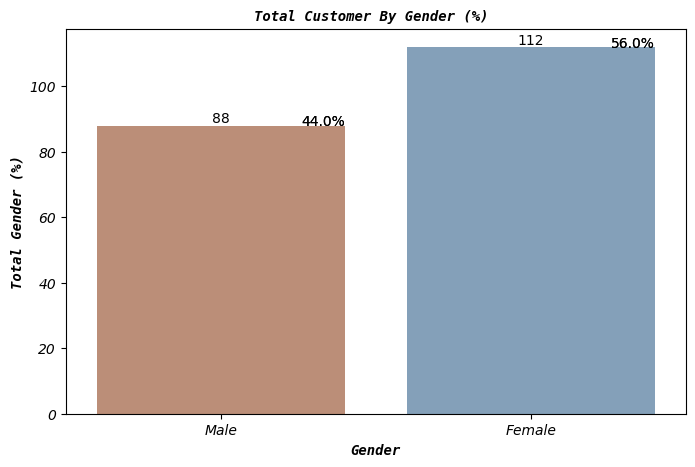

In [197]:
f, axs = plt.subplots(1,1,figsize=(8,5), sharex=True)
ax = sns.countplot(x='Gender', data=df, palette = 'twilight_shifted_r')
plt.xticks(size=10,fontstyle='italic')
plt.yticks(size=10,fontstyle='italic')
plt.title('Total Customer By Gender ',fontstyle='italic',family='monospace', weight=900, size=10)
plt.xlabel('Gender', fontstyle='italic', size=10, family='monospace',weight=900)
plt.ylabel('Total Gender', size=10, fontstyle='italic',family='monospace', weight=900)
for container in ax.containers:
    ax.bar_label(container, horizontalalignment='right',size=10)
ab = sns.countplot(x="Gender",data=df,palette = 'twilight_shifted_r')
for p in ab.patches:
    percentage = '{:.1f}%'.format(100 * p.get_height()/total)
    x = p.get_x() + p.get_width()
    y = p.get_height()
    ax.annotate(percentage, (x, y),ha='right', size=10)
    plt.xticks(size=10,fontstyle='italic')
    plt.yticks(size=10,fontstyle='italic')
    plt.title('Total Customer By Gender (%) ',fontstyle='italic',family='monospace', weight=900, size=10)
    plt.xlabel('Gender', fontstyle='italic', size=10, family='monospace',weight=900)
    plt.ylabel('Total Gender (%)', size=10, fontstyle='italic',family='monospace', weight=900)
plt.show()

- Insight :
  - Pelanggan yang berkujung ke mall paling banyak adalah `Female / Perempuan` berjumlah 122 orang setara dengan 56% dibandingkan `Male / Laki-laki` 88 orang dengan total persentase 44%.

#### **Age**

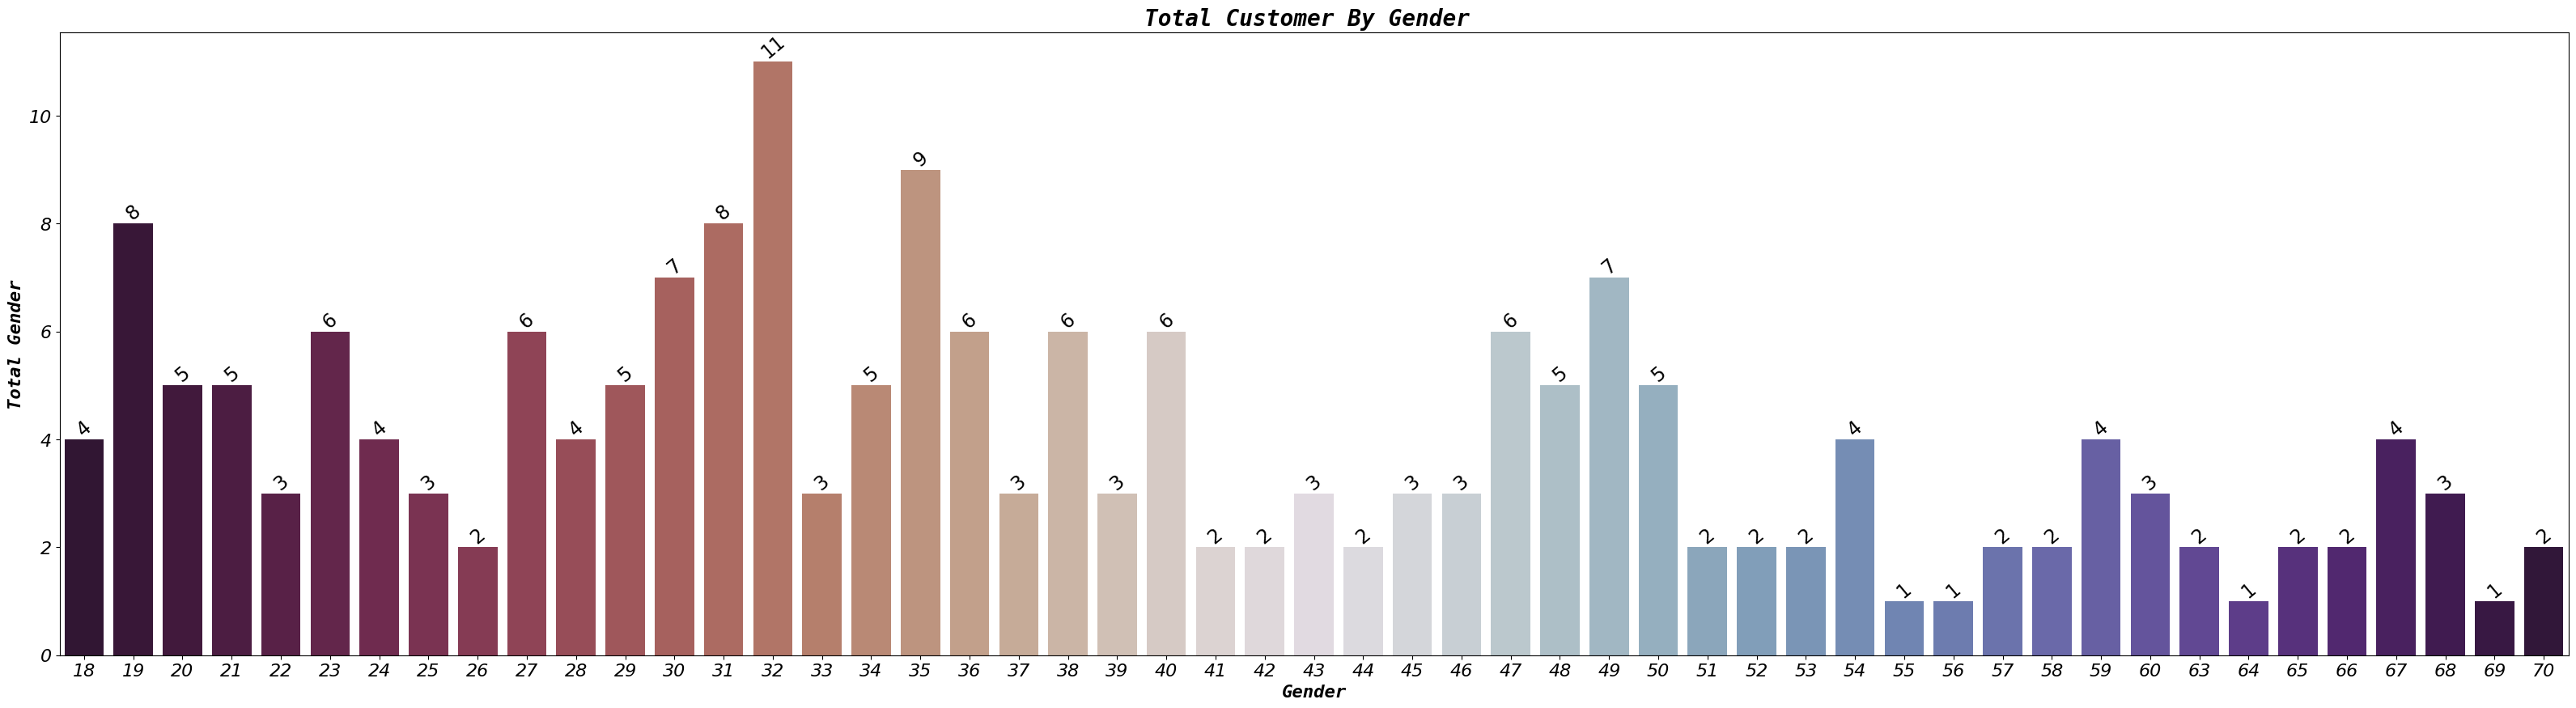

In [198]:
f, axs = plt.subplots(1,1,figsize=(40,10), sharex=True)
ax = sns.countplot(x='Age', data=df, palette = 'twilight_shifted_r')
plt.xticks(size=16,fontstyle='italic')
plt.yticks(size=16,fontstyle='italic')
plt.title('Total Customer By Gender ',fontstyle='italic',family='monospace', weight=900, size=20)
plt.xlabel('Gender', fontstyle='italic', size=16, family='monospace',weight=900)
plt.ylabel('Total Gender', size=16, fontstyle='italic',family='monospace', weight=900)
for container in ax.containers:
    ax.bar_label(container, horizontalalignment='left',size=17, rotation=40)
plt.show()

- Insight :
  - Pelanggan yang berkunjung ke mall mulai dari 18 tahun sampai dengan 70 tahun, namun pelanggan paling banyak pelanggan berkunjung di umur 30 tahunan atau masuk dalam kalangan muda.

In [199]:
labeler = LabelEncoder()
df['Gender'] = labeler.fit_transform(df['Gender'])
df.head()

,Gender,Age,Annual Income,Spending Score
0,1,19,15,39
1,1,21,15,81
2,0,20,16,6
3,0,23,16,77
4,0,31,17,40


#### **Annual Income & Spending Score**

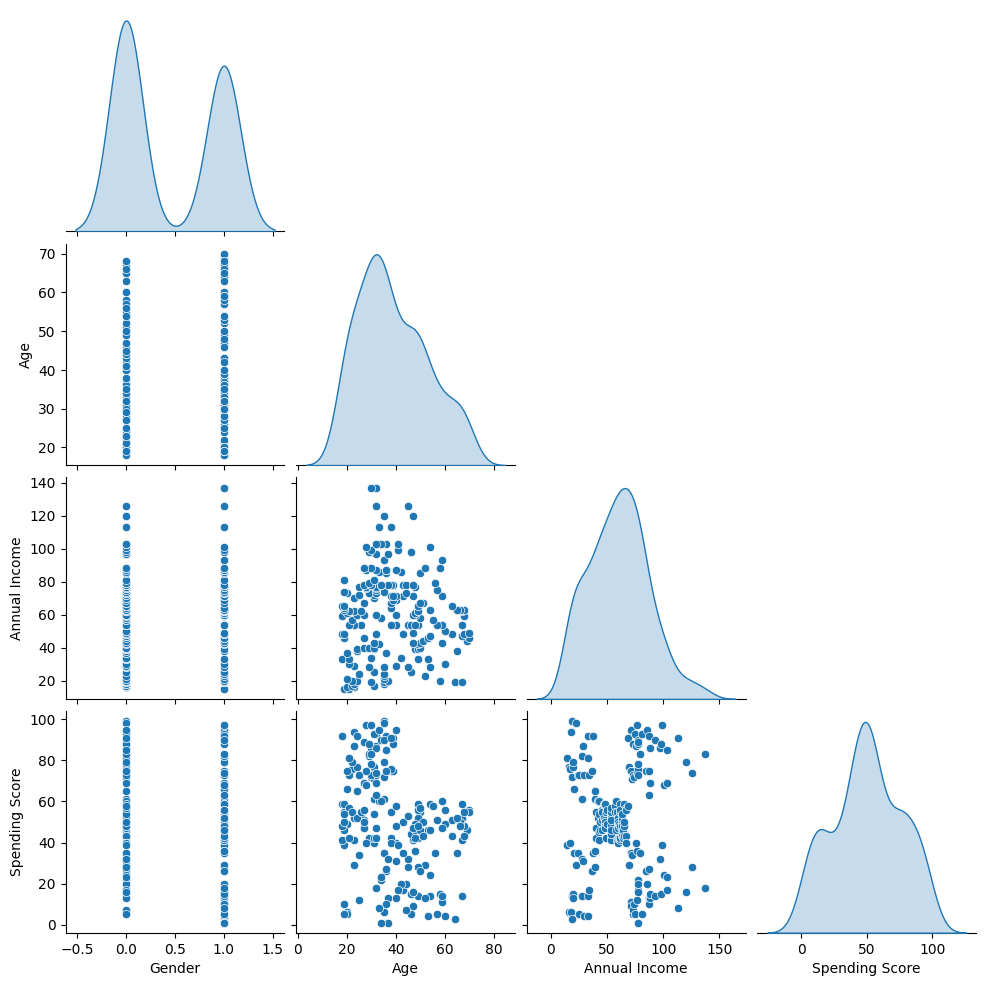

In [200]:
sns.pairplot(df,corner=True,diag_kind='kde',palette = 'twilight_shifted_r')

- Insight :
  - Sebagian besar pelanggan memiliki pendapatan dibawah 100$ K
  - Terdapat normal distribusi pelanggan untuk spending money pada skor 50
  - Hubungan antara kolom `Annual Income` dengan `Spending Money` terdapat 5 kelompok yang membentuk kluster.

In [201]:
df.describe().round(2)

,Gender,Age,Annual Income,Spending Score
count,200.00,200.00,200.00,200.00
mean,0.44,38.85,60.56,50.20
std,0.50,13.97,26.26,25.82
min,0.00,18.00,15.00,1.00
25%,0.00,28.75,41.50,34.75
50%,0.00,36.00,61.50,50.00
75%,1.00,49.00,78.00,73.00
max,1.00,70.00,137.00,99.00


Karena jarak data beragam, maka kita akan melakukan normalisasi terhadap data menggunakan Z-score sehingga data memiliki mean 0 dan standard deviation 1. Semua kolom akan di normalisasi kecuali Gender.


#### **Feature Engineering**

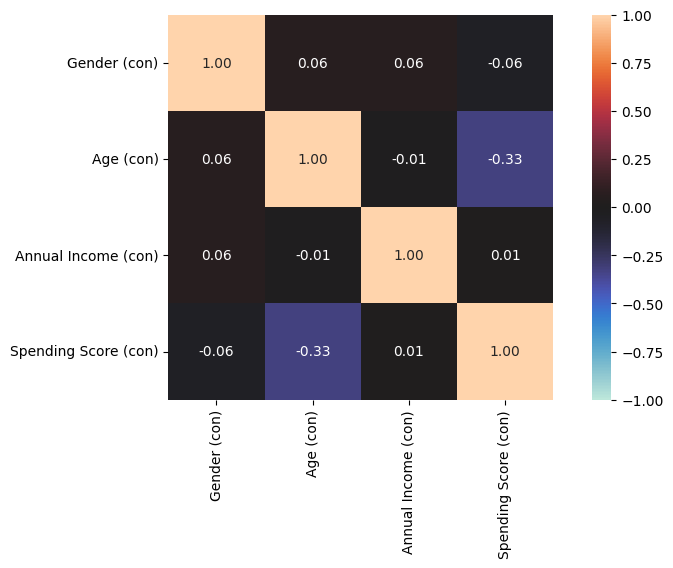

In [202]:
from dython import nominal
nominal.associations(df,figsize=(10,5),mark_columns=True)
plt.show()

- Kolom `Geder` : Kolom Gender memiliki korelasi positif yang lemah (skor 0 - < 60) namun kolom ini akan digunakan sebagai identitas customer yang berkunjung ke mall.
- Kolom `Age` : Kolom Age memiliki korelasi negatif yang lemah (skor 0 - < 60) namun kolom ini akan digunakan sebagai identitas customer yang berkunjung ke mall.
- Kolom `Annual Income` : Kolom Annual Income memiliki korelasi positif yang lemah (skor 0 - < 60) dan kolom ini akan digunakan karena untuk melihat berapa banyak konsumen mengeluarkan uang ketika berpergian ke mall.
- Kolom `Spending Score` : Kolom Spending Score memiliki korelasi positif (skor 0 - < 60) dan kolom ini akan digunakan karena untuk melihat berapa total skor konsumen menghabiskan uang untuk berpegian ke mall.

In [203]:
scaler = StandardScaler()
Gender = df['Gender']
df.drop(columns='Gender')
df = pd.DataFrame(scaler.fit_transform(df), columns=df.columns)
df['Gender'] = Gender
df.head(5)

,Gender,Age,Annual Income,Spending Score
0,1,-1.424569,-1.738999,-0.434801
1,1,-1.281035,-1.738999,1.195704
2,0,-1.352802,-1.700830,-1.715913
3,0,-1.137502,-1.700830,1.040418
4,0,-0.563369,-1.662660,-0.395980


# **4. Clustering**

## Menentukan Jumlah Cluster (Menggunakan Elbow)

In [204]:
from sklearn.cluster import KMeans

Text(0, 0.5, 'Inertia')

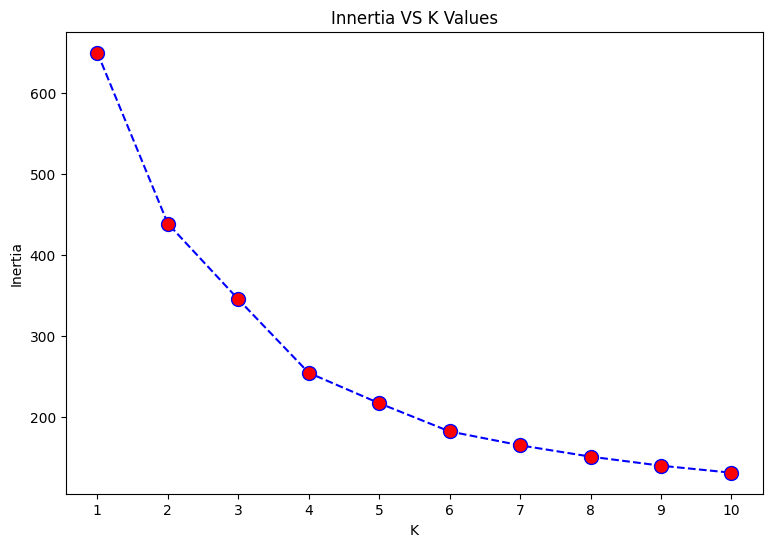

In [205]:
inertia_list = []
for i in range (1,11):
    kmeans = KMeans(n_clusters=i)
    kmeans.fit(df)
    inertia_list.append(kmeans.inertia_)

plt.figure(figsize=(9,6))
plt.plot(range(1,11),inertia_list, color = 'blue',
         linestyle='dashed',marker='o',
         markerfacecolor='red',markersize=10)
plt.title('Innertia VS K Values')
plt.xticks(range(1,11,1))
plt.xlabel('K')
plt.ylabel('Inertia')

- Pada hasil pengelompokan kluster di atas, kita akan menggunakan 5kluster mulai dari kluster 1 sampai kluster 5 karena memiliki proporsi klusteri yang bagus.

#### Evaluasi Kluster

Pada evaluasi kluster ini akan dibuatkan penambahan kolom pada kluster baru dengan nama kolom `Category` untuk menampung hasil dari klustering.

In [206]:
km = KMeans(n_clusters=5).fit(df)
df_ori = pd.read_csv('Mall_Customers.csv')
df_ori.drop('CustomerID',axis=1,inplace=True)
df_ori.rename(columns={'Annual Income (k$)' : 'Annual Income','Spending Score (1-100)' : 'Spending Score'},inplace=True)
df_ori['Gender'] = labeler.fit_transform(df['Gender'])

In [207]:
df_ori.head()

,Gender,Age,Annual Income,Spending Score
0,1,19,15,39
1,1,21,15,81
2,0,20,16,6
3,0,23,16,77
4,0,31,17,40


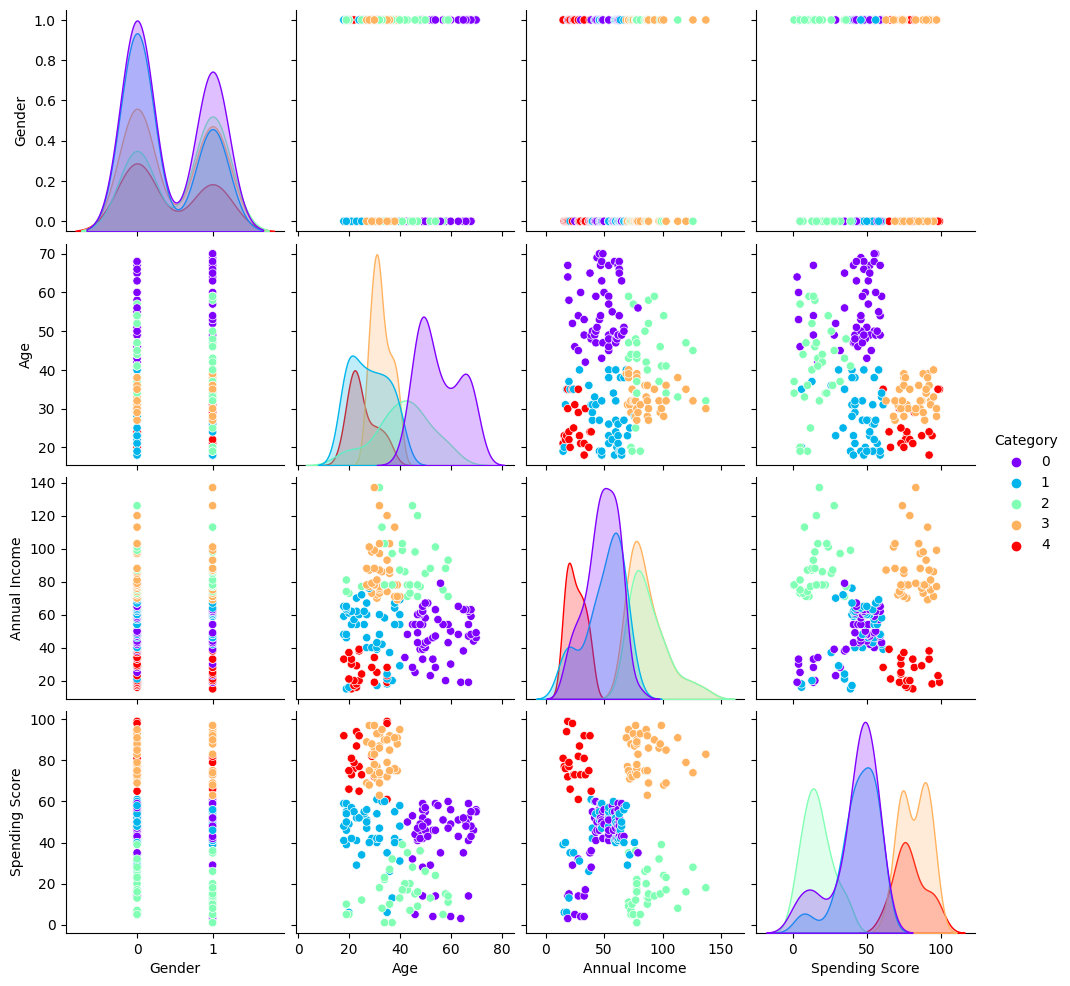

In [208]:
df_ori ['Category'] = km.labels_
sns.pairplot(data = df_ori, hue = 'Category',palette = 'rainbow')

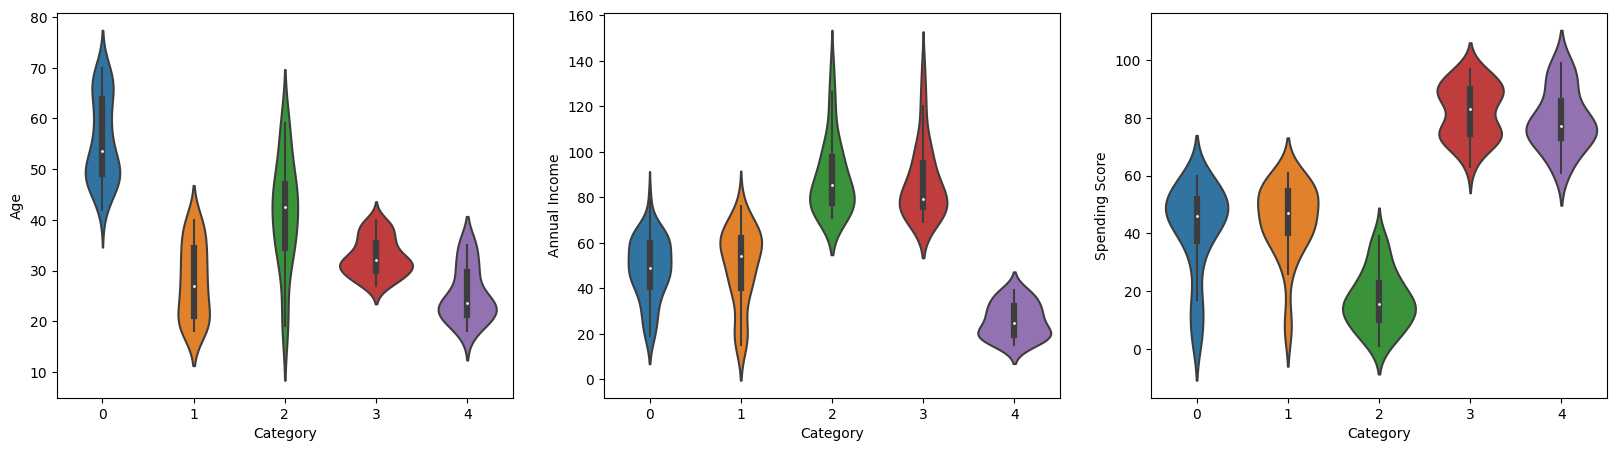

In [209]:
fig, axes = plt.subplots(1,3, figsize=(20,5))

sns.violinplot(x = 'Category',y = 'Age', data = df_ori,ax=axes[0])
sns.violinplot(x = 'Category',y = 'Annual Income', data = df_ori,ax=axes[1])
sns.violinplot(x = 'Category',y = 'Spending Score', data = df_ori,ax=axes[2])
plt.show()

#### **Pembagian Kelompok Klustering**

In [210]:
df_ori[['Age','Annual Income','Spending Score','Category']].groupby('Category').mean()

,Age,Annual Income,Spending Score
Category,,,
0,55.551724,48.482759,41.775862
1,27.957447,50.000000,44.638298
2,41.264706,88.500000,16.764706
3,32.692308,86.538462,82.128205
4,25.272727,25.727273,79.363636


- Klustering yang dibuat ada 4 macam :
  - Klustering kelompok 1 (Category = 0) :
    - Memiliki Rata-rata umur 55 tahun, dengan rata-rata Annual Income 48$ dengan total skor spending money 41.
  - Klustering kelompok 2 (Category = 1) :
    - Memiliki Rata-rata umur 25 tahun, dengan rata-rata Annual Income 50$ dengan total skor spending money 44.
  - Klustering kelompok 3 (Category = 2) :
    - Memiliki Rata-rata umur 32 tahun, dengan rata-rata Annual Income 88$ dengan total skor spending money 16.
  - Klustering kelompok 4 (Category = 3) :
    - Memiliki Rata-rata umur 41 tahun, dengan rata-rata Annual Income 86$ dengan total skor spending money 82.
  - Klustering kelompok 5 (Category = 4) :
    - Memiliki Rata-rata umur 25 tahun, dengan rata-rata Annual Income 25$ dengan total skor spending money 79.

#### **Kelompok 1**

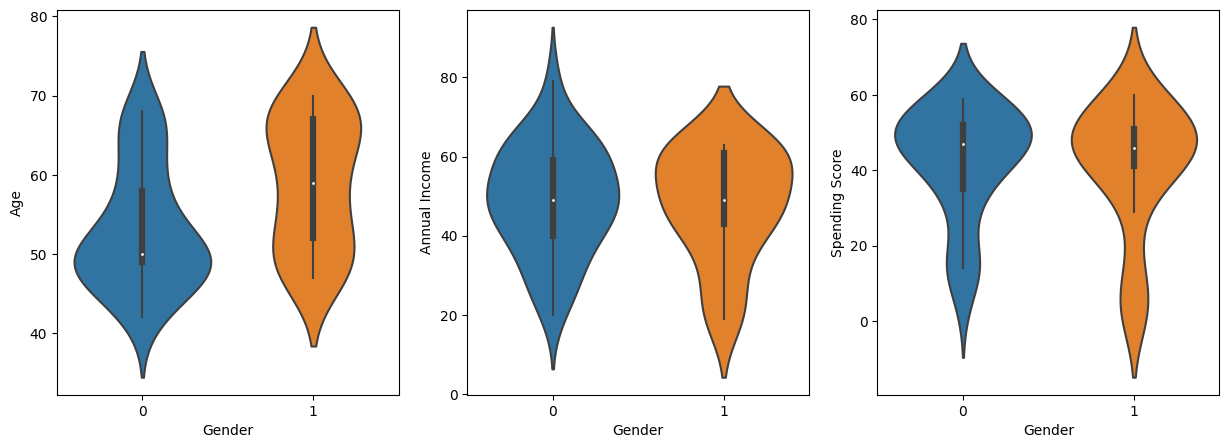

In [212]:
group_1 = df_ori[df_ori['Category']==0]
group_1.head()

fig, axes = plt.subplots(1,3, figsize=(15,5))

sns.violinplot(x = 'Gender',y = 'Age', data = group_1,ax=axes[0])
sns.violinplot(x = 'Gender',y = 'Annual Income', data = group_1,ax=axes[1])
sns.violinplot(x = 'Gender',y = 'Spending Score', data = group_1,ax=axes[2])
plt.show()

Pada kategori 0 ini  dari `Gender Male dan Female` banyak yang berumur diatas 40 tahun dengan `Annual Income` yang sedang setiap bulannya sedang dan `Spending Score` pengeluaran setiap bulannya sedang.

#### **Kelompok 2**

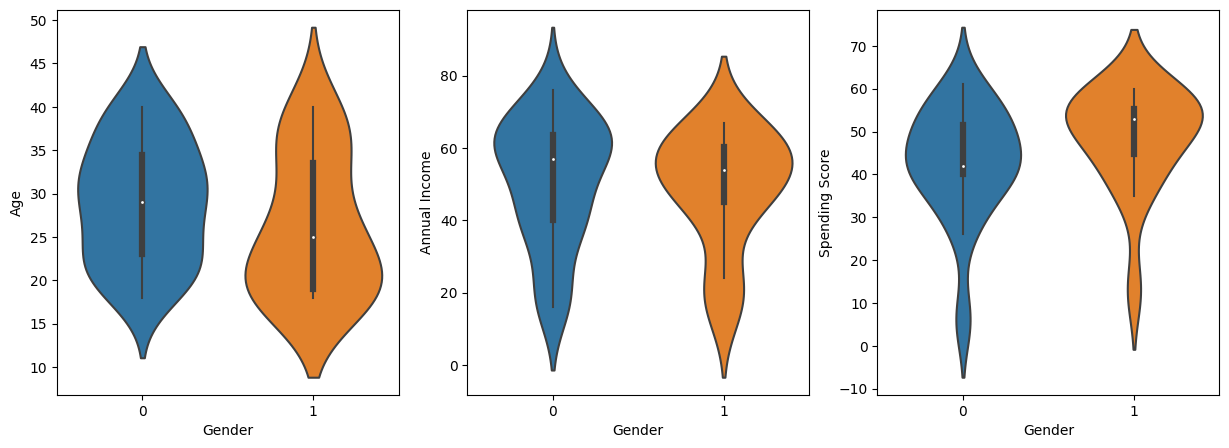

In [213]:
group_2 = df_ori[df_ori['Category']==1]
group_2.head()

fig, axes = plt.subplots(1,3, figsize=(15,5))

sns.violinplot(x = 'Gender',y = 'Age', data = group_2,ax=axes[0])
sns.violinplot(x = 'Gender',y = 'Annual Income', data = group_2,ax=axes[1])
sns.violinplot(x = 'Gender',y = 'Spending Score', data = group_2,ax=axes[2])
plt.show()

Pada kategori `1` ini  dari `Gender Male dan Female` banyak yang berumur 20-30 tahun dengan `Annual Income` yang sedang setiap bulannya sedang dan `Spending Score` pengeluaran setiap bulannya sedang.

#### **Kelompok 3**

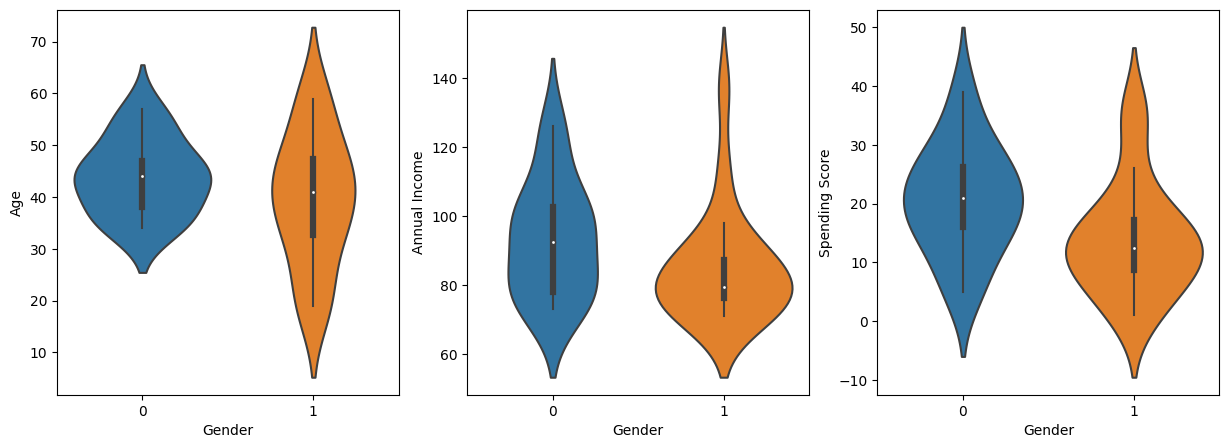

In [214]:
group_3 = df_ori[df_ori['Category']==2]
group_3.head()

fig, axes = plt.subplots(1,3, figsize=(15,5))

sns.violinplot(x = 'Gender',y = 'Age', data = group_3,ax=axes[0])
sns.violinplot(x = 'Gender',y = 'Annual Income', data = group_3,ax=axes[1])
sns.violinplot(x = 'Gender',y = 'Spending Score', data = group_3,ax=axes[2])
plt.show()

Pada kategori 3 ini  dari `Gender Male dan Female` banyak yang berumur diatas 40 tahun dengan `Annual Income` yang sedang setiap bulannya tinggi dan `Spending Score` pengeluaran setiap bulannya rendah.

#### **Kelompok 4**

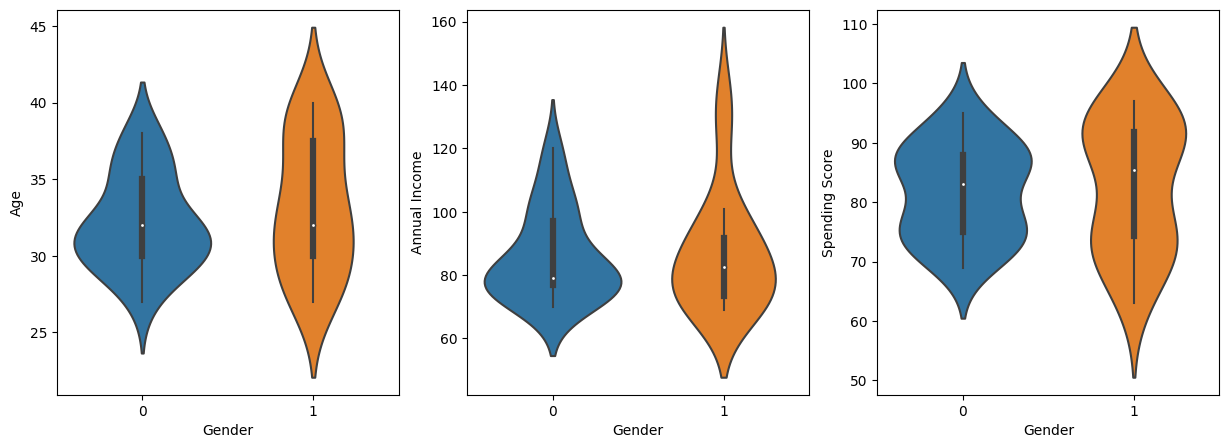

In [218]:
group_4 = df_ori[df_ori['Category']==3]
group_4.head()

fig, axes = plt.subplots(1,3, figsize=(15,5))

sns.violinplot(x = 'Gender',y = 'Age', data = group_4,ax=axes[0])
sns.violinplot(x = 'Gender',y = 'Annual Income', data = group_4,ax=axes[1])
sns.violinplot(x = 'Gender',y = 'Spending Score', data = group_4,ax=axes[2])
plt.show()

Pada kategori 3 ini  dari `Gender Male dan Female` banyak yang berumur dibawah 40 tahun dengan `Annual Income` yang sedang setiap bulannya tinggi dan `Spending Score` pengeluaran setiap bulannya tinggi.

#### **Kelompok 5**

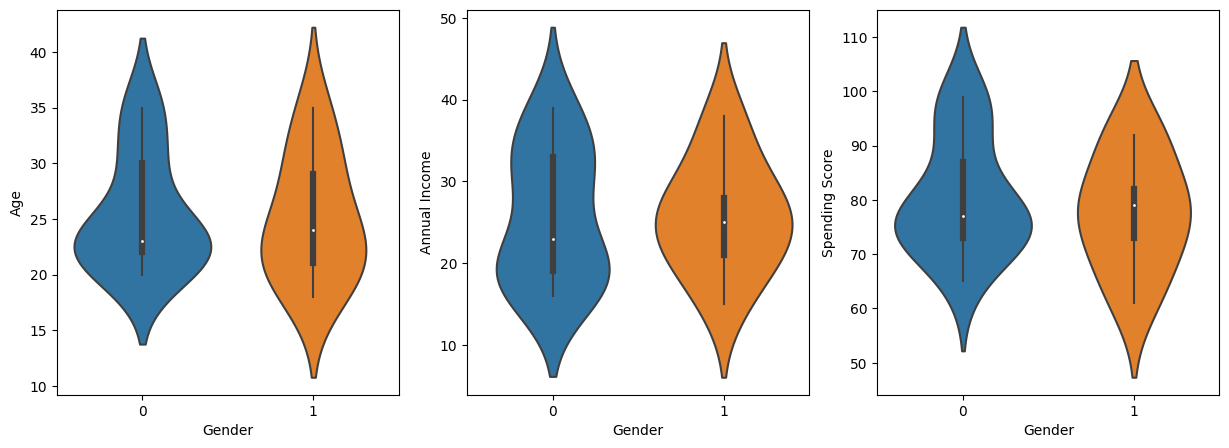

In [217]:
group_5 = df_ori[df_ori['Category']==4]
group_5.head()

fig, axes = plt.subplots(1,3, figsize=(15,5))

sns.violinplot(x = 'Gender',y = 'Age', data = group_4,ax=axes[0])
sns.violinplot(x = 'Gender',y = 'Annual Income', data = group_4,ax=axes[1])
sns.violinplot(x = 'Gender',y = 'Spending Score', data = group_4,ax=axes[2])
plt.show()

Pada kategori 4 ini  dari `Gender Male dan Female` banyak yang berumur dibawah 40 tahun dengan `Annual Income` yang sedang setiap bulannya rendah dan `Spending Score` pengeluaran setiap bulannya tinggi.

# **Kesimpulan**

- Konsumen yang berkunjung ke Mall terbagi menjadi 5 kelompok :
  - Kelompok 1 : Konsumen dengan umur diatas 40 tahun yang memiliki pendapatan sedang dan spending score sedang
  - Kelompok 2 : Konsumen dengan umur dibawah 40 tahun yang memiliki pendapatan rendah dengan spending score sedang.
  - Kelompok 3 : Konsumen dengan umur diatas 40 tahun yang memiliki pendapatan tinggi dengan spending score rendah.
  - Kelompok 4 : Konsumen dengan umur dibawah 40 tahun yang memiliki pendapatan tinggi dan spending score tinggi.
  - Kelompok 5 : Konsumen dengan umur dibawah 40 tahun yang memiliki pendapatan rendah dan spending score tinggi.

# **Saran**

- Tim marketing dapat menggunakan hasil analisa data ini untuk menentukan target pemasaran;
  - Jika tim marketing ingin membangun brading awarness maka dapat difokuskan pada `Kelompok 1, kelompok 2 dan kelompok 3` karena kelompok ini akan berbelanja / ke mall jika memang perlu saja atau menunggu jadwal belanja bulanan.
  - Jika tim marketing ingin meningkatkan penjualan dengan memberikan promo / diskon maka pemasaran dapat ditargetkan pada `Kelompok 4 dan kelompok 5' hal ini dikarenakan konsumen ini memiliki spending score yang tinggi, hal ini dapat menjadi peluang untuk menargetkan mereka dalam penjualan dengan menggunakan strategi memberikan potongan harga / diskon.